In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -xvzf "/content/drive/MyDrive/Colab Notebooks/Processed_CSV/cleaned_email_data.tar.gz"

content/cleaned_email_data.csv


In [3]:
csv_file_path = "/content/content/cleaned_email_data.csv"

In [4]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')

import re
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import os
import glob
import string

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
import multiprocessing
import seaborn as sns
import email
import matplotlib.pyplot as plt

In [73]:
df_csv = pd.read_csv(csv_file_path)
print(df_csv.shape)
df_csv.head()

(476725, 10)


,file,message,body,From,To,Subject,X-From,X-To,employee_name,folder_name
0,/content/maildir/dasovich-j/sent_items/911.,Message-ID: <8642360.1075851633204.JavaMail.ev...,Heeeeeeeeeeeeee Haaaaaaaaaaawww!!!!! Gouge d...,jeff.dasovich@enron.com,"thompson@enron.com, ttt@cpuc.ca.gov",Re: just thinkin',Jeff Dasovich,"Thompson, Thomas W. <ttt@cpuc.ca.gov>",dasovich-j,sent items
1,/content/maildir/dasovich-j/sent_items/384.,Message-ID: <15996888.1075851619794.JavaMail.e...,I'm hooting just thinking about it. Could we ...,jeff.dasovich@enron.com,pr <.palmer@enron.com>,RE: It seems to be unraveling for Davis--Need ...,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Palmer, Mark A. (PR) </O=ENRON/OU=NA/CN=RECIPI...",dasovich-j,sent items
2,/content/maildir/dasovich-j/sent_items/981.,Message-ID: <3389339.1075852585374.JavaMail.ev...,FYI. In case you'd like to listen in on what ...,jeff.dasovich@enron.com,"susan.mara@enron.com, michael.tribolet@enron.c...",FW: A.98-07-003 - Meet and Confer Conference Call,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Mara, Susan </O=ENRON/OU=NA/CN=RECIPIENTS/CN=S...",dasovich-j,sent items
3,/content/maildir/dasovich-j/sent_items/293.,Message-ID: <13586391.1075851617442.JavaMail.e...,Greetings Eve and Bill:\nThis has been forward...,jeff.dasovich@enron.com,"eve@a-klaws.com, cra@calretailers.com",FW: Draft Application for Rehearing,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","'eve@a-klaws.com', ''Bill Dombrowski' ' <cra@c...",dasovich-j,sent items
4,/content/maildir/dasovich-j/sent_items/2403.,Message-ID: <8782396.1075859207216.JavaMail.ev...,Hey. I'm still trying to get through school a...,jeff.dasovich@enron.com,avram@truebluegrass.com,"RE: Alert- new email address for Avram Siegel,...","Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...",'Avram Siegel' <avram@truebluegrass.com>,dasovich-j,sent items


In [94]:
#copy required columns into new dataframe
df = df_csv.filter(["body","Subject","From","To","folder_name"])
df


,body,Subject,From,To,folder_name
0,Heeeeeeeeeeeeee Haaaaaaaaaaawww!!!!! Gouge d...,Re: just thinkin',jeff.dasovich@enron.com,"thompson@enron.com, ttt@cpuc.ca.gov",sent items
1,I'm hooting just thinking about it. Could we ...,RE: It seems to be unraveling for Davis--Need ...,jeff.dasovich@enron.com,pr <.palmer@enron.com>,sent items
2,FYI. In case you'd like to listen in on what ...,FW: A.98-07-003 - Meet and Confer Conference Call,jeff.dasovich@enron.com,"susan.mara@enron.com, michael.tribolet@enron.c...",sent items
3,Greetings Eve and Bill:\nThis has been forward...,FW: Draft Application for Rehearing,jeff.dasovich@enron.com,"eve@a-klaws.com, cra@calretailers.com",sent items
4,Hey. I'm still trying to get through school a...,"RE: Alert- new email address for Avram Siegel,...",jeff.dasovich@enron.com,avram@truebluegrass.com,sent items
...,...,...,...,...,...
476720,I could let the fluff comment fly if you were ...,Re: How can you not be a fan?,susan.scott@enron.com,benjamin.freeman@enron.com,correspondence
476721,I am not worried about MY handling abilities....,Re:,ted.noble@enron.com,susan.scott@enron.com,correspondence
476722,Thanks for the info...you are a wealth of know...,Re: And this one time at band camp...,susan.scott@enron.com,ted.noble@enron.com,correspondence
476723,Attached is a list of footnotes we have come u...,637 Transactional Report Footnotesq,linda.trevino@enron.com,"frazier.king@enron.com, dari.dornan@enron.com,...",order 637


In [95]:
df.shape

(476725, 5)

In [96]:
#find duplicates in body
#df['body'].duplicated().sum()
df.duplicated().sum()

32894

In [97]:
#remove duplicate data
print("before removal: ",df.shape)
df = df.drop_duplicates()
print("after removal",df.shape)

before removal:  (476725, 5)
after removal (443831, 5)


In [98]:
print(df["folder_name"].value_counts())

all documents                  111954
sent                            54671
discussion threads              49254
deleted items                   39204
sent items                      35969
                                ...  
confirms - interest rate            1
unread mail                         1
tw - marketing                      1
bancone                             1
personnel - prc 2001 mid yr         1
Name: folder_name, Length: 1751, dtype: int64


In [99]:
#remove small folders which may not help us
def remove_folders(emails, n):
    # returns the number of folders containing more than 'n' number of emails
    email_count = dict(df['folder_name'].value_counts())
    small_folders = [key for key, val in email_count.items() if val<=n]
    emails = df.loc[~df['folder_name'].isin(small_folders)]
    return emails


In [100]:
n = 200
df = remove_folders(df, n)

In [101]:
df["folder_name"].value_counts()

all documents         111954
sent                   54671
discussion threads     49254
deleted items          39204
sent items             35969
                       ...  
conferences              218
misc                     211
transport                209
janie                    207
8_00                     202
Name: folder_name, Length: 63, dtype: int64

In [102]:
#remove few sent folders and OOB folders as they are not user specific folders
df = df[df.folder_name != 'sent']
df = df[df.folder_name != 'all documents']
df = df[df.folder_name != 'deleted items']
df = df[df.folder_name != 'sent items']
df = df[df.folder_name != "'sent mail"]
df = df[df.folder_name != "calendar"]
df = df[df.folder_name != "'sent"]
df = df[df.folder_name != "attachments"]
print(df.shape)
df["folder_name"].value_counts()

(140032, 5)


discussion threads     49254
inbox                  31710
notes inbox            31000
untitled                4073
personal                2239
schedule crawler        1396
logistics               1146
tw-commercial group     1146
california               987
bill williams iii        943
deal discrepancies       878
management               789
esvl                     658
tufco                    604
resumes                  590
e-mail bin               588
ces                      567
online trading           563
junk                     543
junk file                493
genco-jv_ipo             458
projects                 446
archives                 404
hr                       385
universities             358
iso_ pricecaps           357
corporate                353
it                       343
wellhead                 326
california issues        308
europe                   287
eesirenewableenergy      284
ooc                      279
read                     277
ene_ect       

In [73]:
# rename folder to "other" where files in that are very less
# we will not get accuracy if we keep them as it is
# small_folders = []
# n = 2000
# email_count = dict(df["folder_name"].value_counts())
# [small_folders.append(fname) for fname,count in email_count.items() if count<n ]
# print(len(small_folders))

1741


In [74]:
# new_folder_name = "other"
# def rename_folder(all_folders):
#   final_folders = []
#   for fname in all_folders:
#     if fname in small_folders:
#       final_folders.append(new_folder_name)
#     else:
#       final_folders.append(fname)
#   return final_folders

In [75]:
# df["folder_name"] = rename_folder(df["folder_name"])
# df["folder_name"].value_counts()

all documents         120931
other                  56478
sent                   54709
discussion threads     53785
deleted items          44799
inbox                  36182
sent items             35970
notes inbox            35201
'sent mail             28207
untitled                8114
personal                2349
Name: folder_name, dtype: int64

In [76]:
# df["folder_name"].value_counts()["other"]

56478

In [71]:
df.head()

,folder_name,text
1237,inbox,"sgovenar@govadv.com smara@enron.com, jdasovic@..."
1238,inbox,rob.bradley@enron.com jeff.dasovich@enron.com ...
1239,inbox,sue@sheltercorp.com jeff.dasovich@enron.com e ...
1240,inbox,madeleine@madeleinetodd.com e-mail <.rob@enron...
1241,inbox,sfalbie@msn.com eveningmba@haas.berkeley.edu F...


In [103]:
df["text"] = df["From"]+" "+df["To"]+" "+df["Subject"]+" "+df["body"]
#df["text"] = df["Subject"]+" "+df["body"]
df.head()

,body,Subject,From,To,folder_name,text
1237,I will attend the following hearing next Monda...,Hearing,sgovenar@govadv.com,"smara@enron.com, jdasovic@enron.com",inbox,"sgovenar@govadv.com smara@enron.com, jdasovic@..."
1238,Joe Pratt is the Cullen Professor of Business ...,RE: Participation in Roundtable on Lessons Lea...,rob.bradley@enron.com,jeff.dasovich@enron.com,inbox,rob.bradley@enron.com jeff.dasovich@enron.com ...
1239,Jeff--I have a new e mail address: sue@shelt...,e mail address,sue@sheltercorp.com,jeff.dasovich@enron.com,inbox,sue@sheltercorp.com jeff.dasovich@enron.com e ...
1240,"Sorry--Mike's email is md_mills@yahoo.com, I l...",RE: Save the Date: 12/09/01 - Jeff Walker's 40th,madeleine@madeleinetodd.com,"e-mail <.rob@enron.com>, e-mail <.jeff@enron.c...",inbox,madeleine@madeleinetodd.com e-mail <.rob@enron...
1241,"Fellow MBAers,\n\nDovetailing Ken's email rega...",Fw: CSO-This Week In Finance,sfalbie@msn.com,eveningmba@haas.berkeley.edu,inbox,sfalbie@msn.com eveningmba@haas.berkeley.edu F...


In [104]:
#remove other columns
remove_cols = ["Subject","From","To","body"]
df.drop(axis=1,inplace=True,columns=remove_cols)
print(df.shape)
df.head()

(140032, 2)


,folder_name,text
1237,inbox,"sgovenar@govadv.com smara@enron.com, jdasovic@..."
1238,inbox,rob.bradley@enron.com jeff.dasovich@enron.com ...
1239,inbox,sue@sheltercorp.com jeff.dasovich@enron.com e ...
1240,inbox,madeleine@madeleinetodd.com e-mail <.rob@enron...
1241,inbox,sfalbie@msn.com eveningmba@haas.berkeley.edu F...


In [105]:
#pre-process and remove unwanted chars and spaces and new lines
def pre_process_data(all_recs):
  resp = []
  for rec in all_recs:
    rec = rec.lower() #Converting to Lower case
    rec = re.sub('<.*?>',' ',rec) # remove html tags
    #rec = re.sub('[^a-zA-Z]',' ',rec) #remove non-alphabet
    #rec = re.sub(r'\s+[a-zA-Z]\s+',' ',rec) #remove single character
    rec = re.sub(r'\n+', ' ',rec) # remove extra new lines
    #rec = re.sub("["+string.punctuation+"]"," ",rec) #removing all punctuations and replaing with  empty space
    rec = re.sub(r'\s+',' ',rec) #remove extra spaces

    resp.append(rec)
  return resp

In [106]:
import time

In [107]:
start = time.time()
df["text"] = pre_process_data(df["text"])
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  22.76037907600403


In [83]:
# '''
# all documents         120931
# other                  56478
# sent                   54709
# discussion threads     53785
# deleted items          44799
# inbox                  36182
# sent items             35970
# notes inbox            35201
# 'sent mail             28207
# untitled                8114
# personal                2349
# '''
# df = df[df.folder_name != 'untitled']
# df = df[df.folder_name != 'personal']
# df = df[df.folder_name != 'other']
# df["folder_name"].value_counts()

all documents         120931
sent                   54709
discussion threads     53785
deleted items          44799
inbox                  36182
sent items             35970
notes inbox            35201
'sent mail             28207
Name: folder_name, dtype: int64

In [84]:
# df_0 = df[df['folder_name']=="all documents"]
# #df_1 = df[df['folder_name']=="other"]
# df_2 = df[df['folder_name']=="sent"]
# df_3 = df[df['folder_name']=="discussion threads"]
# df_4 = df[df['folder_name']=="deleted items"]
# df_5 = df[df['folder_name']=="inbox"]
# df_6 = df[df['folder_name']=="sent items"]
# df_7 = df[df['folder_name']=="notes inbox"]
# df_8 = df[df['folder_name']=="'sent mail"]


In [85]:
# print(df_0.shape)
# #print(df_1.shape)
# print(df_2.shape)
# print(df_3.shape)
# print(df_4.shape)
# print(df_5.shape)
# print(df_6.shape)
# print(df_7.shape)
# print(df_8.shape)

(120931, 2)
(54709, 2)
(53785, 2)
(44799, 2)
(36182, 2)
(35970, 2)
(35201, 2)
(28207, 2)


In [86]:
# df_len = df_8.shape[0]
# df_0_ds = df_0.sample(df_len)
# #df_1_ds = df_1.sample(df_len)
# df_2_ds = df_2.sample(df_len)
# df_3_ds = df_3.sample(df_len)
# df_4_ds = df_4.sample(df_len)
# df_5_ds = df_5.sample(df_len)
# df_6_ds = df_6.sample(df_len)
# df_7_ds = df_7.sample(df_len)
# df_8_ds = df_8.sample(df_len)


In [87]:
# print(df_3_ds.shape)
# #print(df_1_ds.shape)
# print(df_2_ds.shape)
# print(df_0_ds.shape)
# print(df_4_ds.shape)
# print(df_5_ds.shape)
# print(df_6_ds.shape)
# print(df_7_ds.shape)
# print(df_8_ds.shape)


(28207, 2)
(28207, 2)
(28207, 2)
(28207, 2)
(28207, 2)
(28207, 2)
(28207, 2)
(28207, 2)


In [88]:
# df = pd.concat([df_0_ds,df_2_ds,df_3_ds,df_4_ds,df_5_ds,df_6_ds,df_7_ds,df_8_ds])
# print(df.shape)
# df.head(3)

(225656, 2)


,folder_name,text
96931,all documents,re erequests can someone call me at i in the m...
149453,all documents,re isda agreement between enron canada corp an...
4911,all documents,re thanks steve ll coordinate with rosie best ...


In [89]:
# print(df.shape)

(225656, 2)


#RoBERTa
https://arxiv.org/pdf/1907.11692.pdf

In [30]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!pip3 install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 47.0 MB/s eta 0:00:00


In [32]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.2 MB/s eta 0:00:00


In [5]:
!pip3 install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 17.4 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

In [33]:
import numpy as np
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [7]:
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

In [34]:
# Detect hardware, return appropriate distribution strategy 
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set (always set in Kaggle)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    #strategy = tf.distribute.experimental.TPUStrategy(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    print("inside exception",ValueError)
    strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)

Running on TPU  grpc://10.54.89.146:8470
Number of replicas: 8


In [108]:
MODEL_NAME = 'roberta-base'
MAX_LEN = 256
ARTIFACTS_PATH = '../artifacts/'

BATCH_SIZE = 8 * strategy.num_replicas_in_sync
EPOCHS = 15

if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)

In [109]:
X_data = df[['text']].to_numpy().reshape(-1)
y_data = df[['folder_name']].to_numpy().reshape(-1)

In [110]:
n_texts = len(X_data)
print('Texts in dataset: %d' % n_texts)

folders = df['folder_name'].unique()
n_folders = len(folders)
print('Number of folders: %d' % n_folders)



Texts in dataset: 140032
Number of folders: 55


In [111]:
def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        # Tokenize
        tok_text = tokenizer.tokenize(text)
        
        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])
        
        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN
        
        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')
        
        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [112]:
# Transform folder into numbers
folder_to_id = {}
folder_to_name = {}

for index, c in enumerate(y_data):
    if c in folder_to_id:
        folder_id = folder_to_id[c]
    else:
        folder_id = len(folder_to_id)
        folder_to_id[c] = folder_id
        folder_to_name[folder_id] = c
    
    y_data[index] = folder_id

# Display dictionary
folder_to_name

{0: 'inbox',
 1: 'personal',
 2: 'eci',
 3: 'notes inbox',
 4: 'discussion threads',
 5: 'transport',
 6: 'eol',
 7: 'ces',
 8: 'resumes',
 9: 'junk',
 10: 'untitled',
 11: 'volume mang.',
 12: 'info',
 13: 'regulatory',
 14: 'archives',
 15: 'misc',
 16: 'janie',
 17: 'projects',
 18: 'eesirenewableenergy',
 19: 'california',
 20: 'ferc',
 21: 'california issues',
 22: 'online trading',
 23: '8_00',
 24: 'it',
 25: 'corporate',
 26: 'articles',
 27: 'tw-commercial group',
 28: 'schedule crawler',
 29: 'hr',
 30: 'bill williams iii',
 31: 'heat wave',
 32: 'europe',
 33: 'wellhead',
 34: 'tufco',
 35: 'industrials',
 36: 'logistics',
 37: 'ene_ect',
 38: 'management',
 39: 'conferences',
 40: 'universities',
 41: 'nelson',
 42: 'e-mail bin',
 43: 'esvl',
 44: 'ooc',
 45: 'east power',
 46: 'iso_ pricecaps',
 47: 'read',
 48: 'junk file',
 49: 'lm6000',
 50: 'master netting',
 51: 'genco-jv_ipo',
 52: 'deal discrepancies',
 53: 'corporate comm',
 54: 'gir'}

In [113]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=777) 

In [114]:
# Import tokenizer from HuggingFace
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

In [115]:
X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)

y_train = np.asarray(y_train, dtype='int32')
y_test = np.asarray(y_test, dtype='int32')

In [116]:
def build_model(n_folders):
    with strategy.scope():
        input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
        input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
        input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

        # Import RoBERTa model from HuggingFace
        roberta_model = TFRobertaModel.from_pretrained(MODEL_NAME)
        x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

        # Huggingface transformers have multiple outputs, embeddings are the first one,
        # so let's slice out the first position
        x = x[0]

        x = tf.keras.layers.Dropout(0.1)(x)
        x = tf.keras.layers.Flatten()(x)
        x = tf.keras.layers.Dense(256, activation='relu')(x)
        x = tf.keras.layers.Dense(n_folders, activation='softmax')(x)

        model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
        #lr=1e-5,
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-7),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        return model

In [117]:
with strategy.scope():
    model = build_model(n_folders)
    model.summary()

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 256)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_roberta_model_2 (TFRobertaM  TFBaseModelOutputWi  124645632  ['input_word_ids[0][0]',         
 odel)                          thPoolingAndCrossAt               'input_mask[0][0]',       

In [118]:
#train model
with strategy.scope():
    print('Training...')
    history = model.fit(X_train,
                        y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        verbose=1,
                        validation_data=(X_test, y_test))

Training...
Epoch 1/15


1532/1532 [==============================] - 419s 219ms/step - loss: 2.3866 - accuracy: 0.3199 - val_loss: 2.0852 - val_accuracy: 0.3647
Epoch 2/15
1532/1532 [==============================] - 275s 179ms/step - loss: 2.0639 - accuracy: 0.3688 - val_loss: 1.9820 - val_accuracy: 0.4019
Epoch 3/15
1532/1532 [==============================] - 275s 180ms/step - loss: 1.9694 - accuracy: 0.4079 - val_loss: 1.8979 - val_accuracy: 0.4415
Epoch 4/15
1532/1532 [==============================] - 275s 180ms/step - loss: 1.8867 - accuracy: 0.4461 - val_loss: 1.8178 - val_accuracy: 0.4724
Epoch 5/15
1532/1532 [==============================] - 275s 180ms/step - loss: 1.8137 - accuracy: 0.4744 - val_loss: 1.7492 - val_accuracy: 0.4963
Epoch 6/15
1532/1532 [==============================] - 275s 180ms/step - loss: 1.7449 - accuracy: 0.4984 - val_loss: 1.6802 - val_accuracy: 0.5171
Epoch 7/15
1532/1532 [==============================] - 275s 180ms/step - loss: 1.6841 - accuracy: 0.5170 - val_loss: 1.614

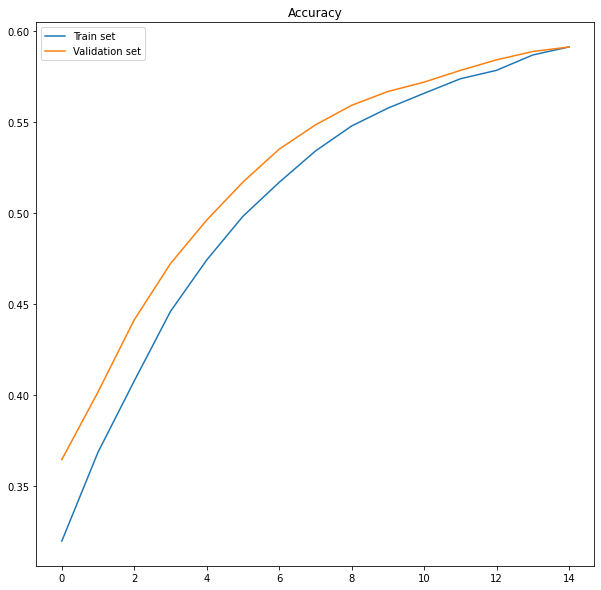

In [119]:
# This plot will look much better if we train models with more epochs, but anyway here is
plt.figure(figsize=(10, 10))
plt.title('Accuracy')

xaxis = np.arange(len(history.history['accuracy']))
plt.plot(xaxis, history.history['accuracy'], label='Train set')
plt.plot(xaxis, history.history['val_accuracy'], label='Validation set')
plt.legend()

In [120]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 59.14%
